## 1. Định nghĩa vấn đề (Define Problem)
Mô tả: Bộ dữ liệu bao gồm 768 mẫu từ phụ nữ người da đỏ Pima (ít nhất 21 tuổi), với 8 thuộc tính đo lường liên quan đến sức khỏe. Mục tiêu là dự đoán liệu bệnh nhân có mắc bệnh đái tháo đường hay không dựa trên các tiêu chuẩn của Tổ chức Y tế Thế giới (WHO).

Dữ liệu vào: 
- Số lần mang thai (pregnancies)
- Nồng độ glucose huyết tương sau 2 giờ (glucose)
- Huyết áp tâm trương (blood_pressure, mm Hg)
- Độ dày nếp gấp da cánh tay sau (skin_thickness, mm)
- Insulin huyết thanh sau 2 giờ (insulin, mu U/ml)
- Chỉ số khối cơ thể (bmi, kg/m²)
- Hàm phả hệ tiểu đường (diabetes_pedigree)
- Tuổi (age, năm)

Kết quả: Outcome (0: Không mắc bệnh, 1: Mắc bệnh đái tháo đường)

Phân bố lớp: 500 mẫu lớp 0, 268 mẫu lớp 1.

Nguồn gốc: National Institute of Diabetes and Digestive and Kidney Diseases (qua UCI Machine Learning Repository).

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [2]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
import joblib

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

In [3]:
# Load dataset
data_path  = "D:\TAILIEUHOC\Khaiphadulieu\data-20250926T091006Z-1-001\data\pima-indians-diabetes.data.csv"
data_names = [
    "pregnancies", 
    "glucose", 
    "blood-pressure", 
    "skin-thickness", 
    "insulin", 
    "bmi", 
    "diabetes-pedigree", 
    "age", 
    "class"
]
df_dataset = pd.read_csv(data_path, names = data_names)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [4]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
pregnancies            int64
glucose                int64
blood-pressure         int64
skin-thickness         int64
insulin                int64
bmi                  float64
diabetes-pedigree    float64
age                    int64
class                  int64
dtype: object
+ Contents: 


,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood-pressure     768 non-null    int64  
 3   skin-thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes-pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   class              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 đặc trưng để phân lớp: pregnancies, glucose, blood-pressure, skin-thickness, insulin, bmi, diabetes-pedigree, age
+ Các đặc trưng có kiểu dữ liệu số: gồm 7 cột kiểu int64 và 2 cột kiểu float64
+ Một số đặc trưng có thể đo bằng đơn vị sinh học như mg/dL (glucose), mm Hg (blood-pressure), mm (skin-thickness), mu U/ml (insulin), kg/m² (bmi)
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu để phân lớp nằm ở cột class, với giá trị 0 hoặc 1 (0: không mắc tiểu đường, 1: mắc tiểu đường)



#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [5]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`glucose`==148 and `blood-pressure`==72 and `class`==1"
    s_query2 = "`glucose`==85 and `blood-pressure`==66 and `class`==0"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có dòng bị trùng.
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [6]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood-pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin-thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetes-pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:

Bộ dữ liệu gồm 768 quan sát, trong đó khoảng 35% người mắc tiểu đường. Các biến lâm sàng (glucose, huyết áp, insulin, độ dày da, BMI) xuất hiện nhiều giá trị bằng 0 bất thường, có khả năng là dữ liệu thiếu. Một số biến phân bố lệch và có ngoại lai (insulin, glucose). Tuổi trung bình là 33, đa số còn trẻ, nhưng có cá thể trên 80. Nhìn chung, dữ liệu cần xử lý giá trị thiếu và ngoại lai trước khi phân tích sâu hoặc xây dựng mô hình.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [7]:
df_dataset["class"].value_counts()

class
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:

Dữ liệu gồm 500 quan sát không mắc tiểu đường (65,1%) và 268 quan sát mắc tiểu đường (34,9%), cho thấy nhãn hơi mất cân bằng nhưng vẫn ở mức chấp nhận được cho phân tích và mô hình hóa.


#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [8]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood-pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin-thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes-pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:

Các cặp tính chất có độ tương đồng cao:
+ (skin-thickness, insulin) = 0.437
+ (skin-thickness, bmi) = 0.393
+ (glucose, insulin) = 0.331
+ (glucose, class) = 0.467
+ (bmi, class) = 0.293
+ Đặc biệt, biến age có tương quan khá mạnh với pregnancies (0.544).

Hầu hết các cặp khác có hệ số tương quan thấp, cho thấy mức độ liên hệ không đáng kể.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

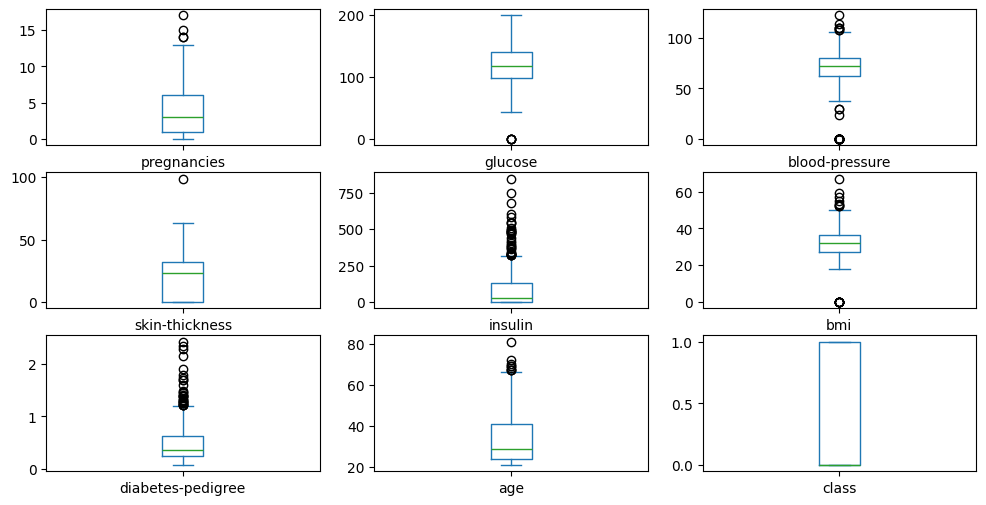

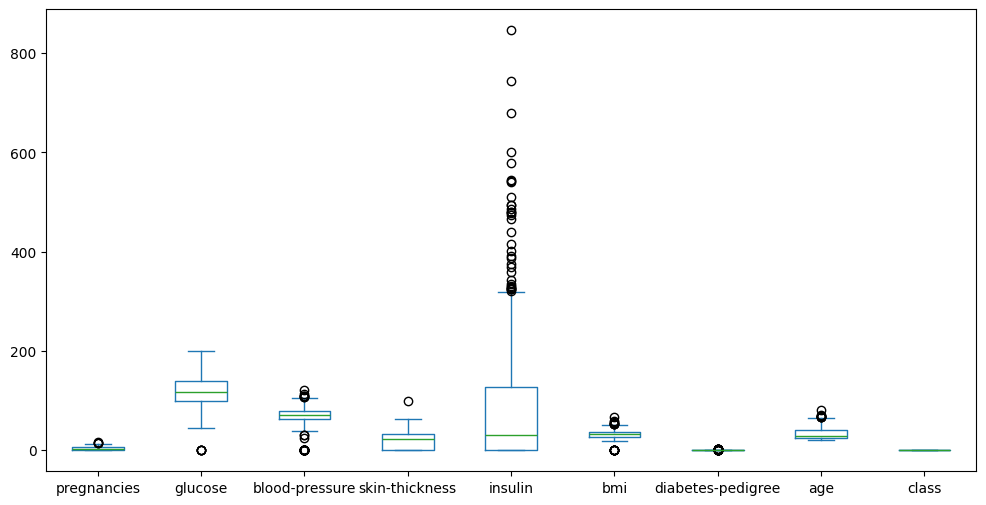

In [9]:
df_dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét**:
+ Dữ liệu có nhiều ngoại lệ, đặc biệt ở insulin.

+ Glucose và BMI có phân bố lệch và tương quan với biến class, cho thấy vai trò quan trọng trong việc dự đoán khả năng mắc tiểu đường.

+ Pregnancies và age tăng cùng nhau, phản ánh mối quan hệ nhân khẩu học đáng lưu ý.

**Biểu đồ Histogram**

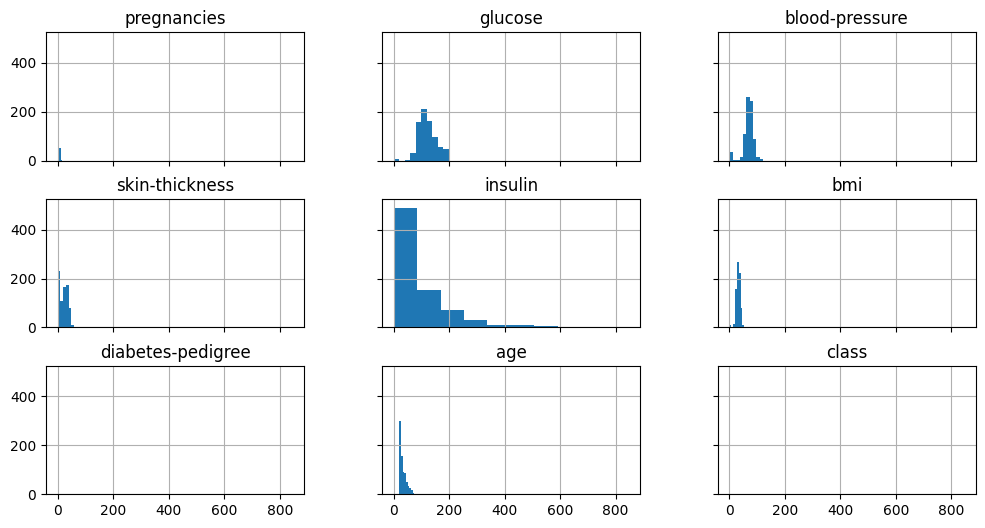

In [10]:
df_dataset.hist(figsize=(12, 6), bins = 10, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

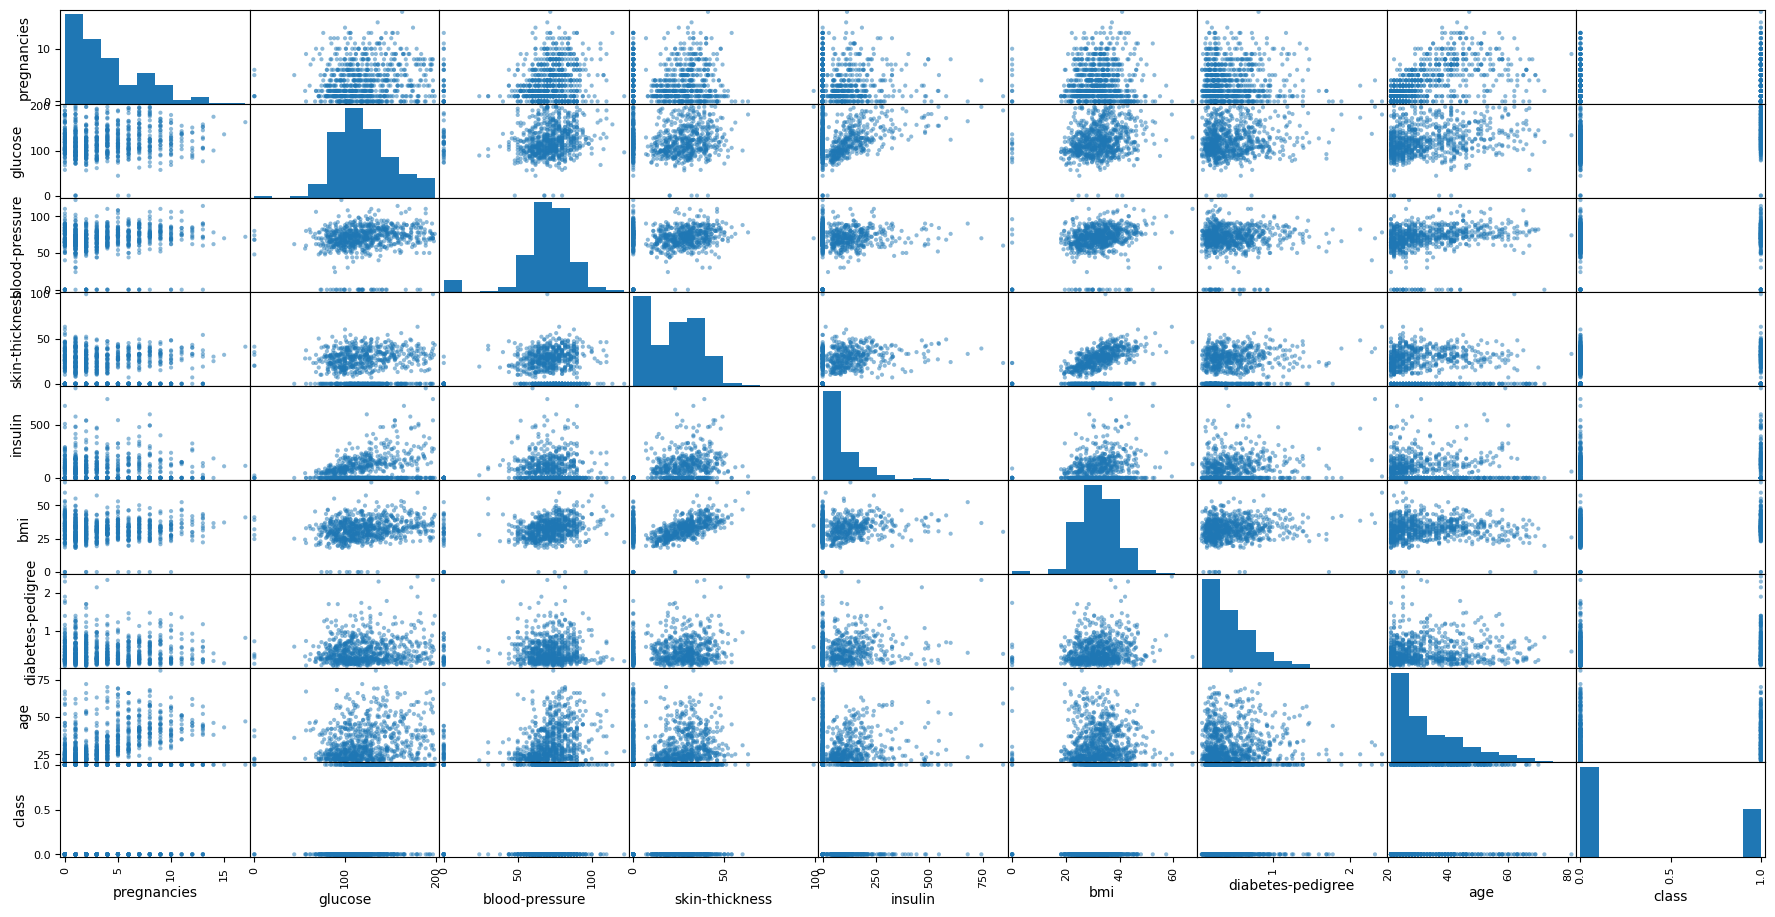

In [11]:
pd.plotting.scatter_matrix(df_dataset, figsize=(22,11));

([<matplotlib.axis.YTick at 0x2ab94534550>,
 [Text(0, 0, 'pregnancies'),
  Text(0, 1, 'glucose'),
  Text(0, 2, 'blood-pressure'),
  Text(0, 3, 'skin-thickness'),
  Text(0, 4, 'insulin'),
  Text(0, 5, 'bmi'),
  Text(0, 6, 'diabetes-pedigree'),
  Text(0, 7, 'age'),
  Text(0, 8, 'class')])

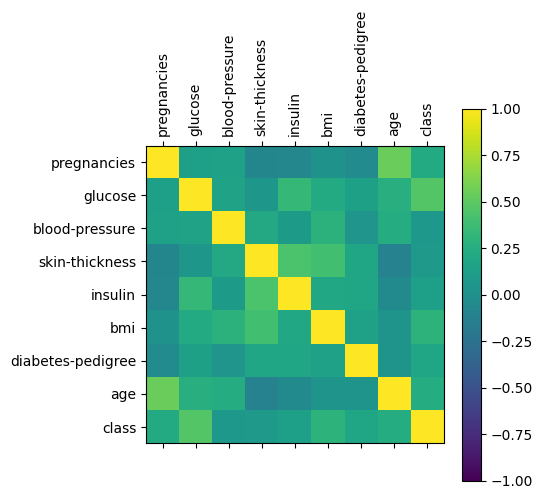

In [12]:
correlations = df_dataset.corr()
plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(np.arange(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(np.arange(len(correlations.columns)), correlations.columns)


### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [13]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [14]:
display.display(df_dataset[df_dataset.duplicated()])

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class


+ Không có dữ liệu trùng nhau

#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [15]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


+ Không có giá trị rỗng

### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [16]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["class"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

+ Không có dữ liệu danh mục

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [17]:
# Min-Max Normalization
scale_columns = [
    "pregnancies", 
    "glucose", 
    "blood-pressure", 
    "skin-thickness", 
    "insulin", 
    "bmi", 
    "diabetes-pedigree", 
    "age", 
    "class"
]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


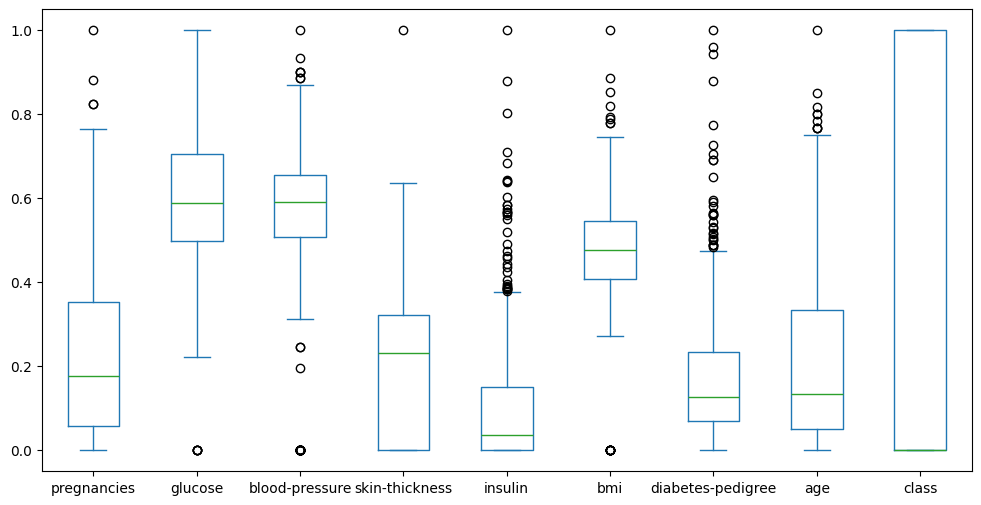

In [18]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [19]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


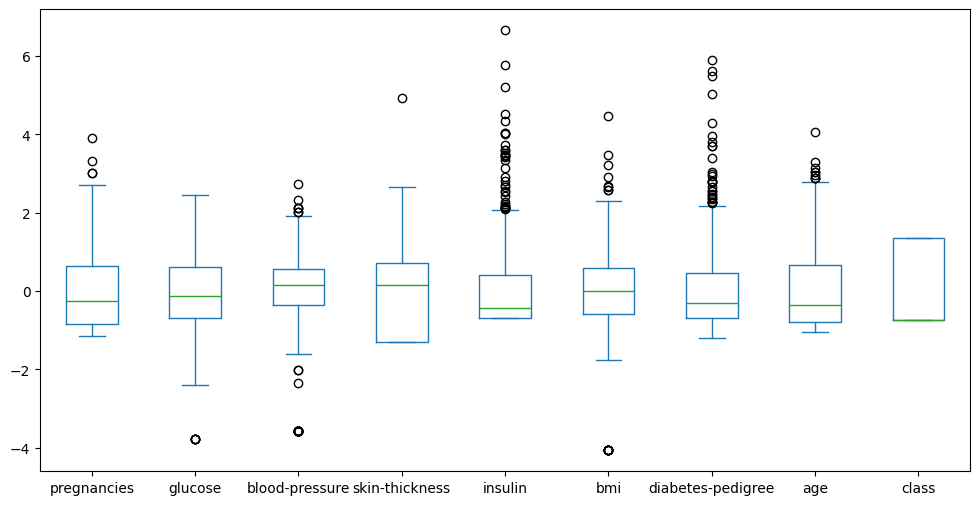

In [20]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [21]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood-pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin-thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes-pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [22]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  0.    124.     70.     20.      0.     27.4     0.254  36.   ]
 [  9.    122.     56.      0.      0.     33.3     1.114  33.   ]
 [ 13.    158.    114.      0.      0.     42.3     0.257  44.   ]
 [  6.    107.     88.      0.      0.     36.8     0.727  31.   ]
 [  3.    142.     80.     15.      0.     32.4     0.2    63.   ]]
Output = [1. 1. 1. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[1.000e+00 1.260e+02 6.000e+01 0.000e+00 0.000e+00 3.010e+01 3.490e-01
  4.700e+01]
 [6.000e+00 1.030e+02 6.600e+01 0.000e+00 0.000e+00 2.430e+01 2.490e-01
  2.900e+01]
 [5.000e+00 8.800e+01 7.800e+01 3.000e+01 0.000e+00 2.760e+01 2.580e-01
  3.700e+01]
 [1.000e+00 1.060e+02 7.000e+01 2.800e+01 1.350e+02 3.420e+01 1.420e-01
  2.200e+01]
 [1.300e+01 1.530e+02 8.800e+01 3.700e+01 1.400e+02 4.060e+01 1.174e+00
  3.900e+01]]
Output = [1. 0. 0. 0. 0.]


In [24]:
# ==============================
# Logistic Regression & Random Forest
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# 1) Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr)
})

# 2) Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf)
})

# Hiển thị kết quả thành bảng
df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.779221   0.653061  0.790123  0.715084
1        Random Forest  0.753247   0.693548  0.530864  0.601399


**Đánh giá kết quả mô hình**:
+ Logistic Regression đạt Accuracy = 0.78, Recall = 0.79 và F1-score = 0.72. Mô hình thể hiện khả năng phát hiện đúng các trường hợp mắc bệnh cao, đồng thời duy trì sự cân bằng tốt giữa Precision và Recall. Điều này giúp hạn chế việc bỏ sót bệnh nhân, một yếu tố quan trọng trong bối cảnh y tế.

+ Random Forest có Precision = 0.69 nhỉnh hơn Logistic Regression, tức là tỷ lệ dự đoán đúng trong số các ca được phân loại là dương tính cao hơn. Tuy nhiên, Recall chỉ đạt 0.53, cho thấy mô hình bỏ sót nhiều trường hợp mắc bệnh, dẫn đến F1-score thấp hơn (0.60).

In [28]:
# In ra 10 dòng so sánh dự đoán giữa 2 mô hình và kết quả thực tế
n_samples = 10
y_true = y_test[:n_samples]
y_pred_lr = lr.predict(X_test[:n_samples])
y_pred_rf = rf.predict(X_test[:n_samples])

print(f"{'Index':<5}{'Thực tế':<10}{'LR dự đoán':<15}{'RF dự đoán':<15}")
print("-" * 50)
for i in range(n_samples):
    print(f"{i:<5}{int(y_true[i]):<10}{int(y_pred_lr[i]):<15}{int(y_pred_rf[i]):<15}")


IndexThực tế   LR dự đoán     RF dự đoán     
--------------------------------------------------
0    1         0              1              
1    0         0              0              
2    0         0              0              
3    0         0              0              
4    0         1              1              
5    0         0              0              
6    0         0              0              
7    0         1              1              
8    0         0              0              
9    1         1              1              


In [25]:
# Lưu thông tin
save_dir = "exps/pima"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
os.listdir(save_dir)

['class_encoder.joblib', 'data.npz', 'df_clean.xlsx']

In [26]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [27]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,pregnancies,glucose,blood-pressure,skin-thickness,insulin,bmi,diabetes-pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Kết thúc